In [1]:
#Importing All Necessary Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Loading CSV File for Modeling 
df = pd.read_csv('cancer_data.csv')
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
#Find out the number of rows and columns match the dataset 
df.shape

(418, 31)

In [4]:
#Check if there are any empty values in the dataset
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
#Find the number of M and B cells in the dataset 
df['diagnosis'].value_counts()

B    262
M    156
Name: diagnosis, dtype: int64

In [6]:
#Change categorical data to numerical values
LabelEncoder_df = LabelEncoder()
df.iloc[:,0] = LabelEncoder_df.fit_transform(df.iloc[:,0])
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Get correlation of the columns
df.iloc[:,0:31].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.703981,0.376431,0.717798,0.685527,0.350705,0.590266,0.685169,0.765503,0.353598,...,0.758741,0.426058,0.765585,0.716831,0.403676,0.592240,0.657847,0.790585,0.447428,0.338901
radius_mean,0.703981,1.000000,0.270886,0.997757,0.986925,0.164921,0.506118,0.659786,0.823669,0.178724,...,0.970703,0.246895,0.965082,0.941941,0.084680,0.401570,0.502553,0.743840,0.182609,-0.004686
texture_mean,0.376431,0.270886,1.000000,0.275607,0.266664,-0.072618,0.182496,0.246704,0.226515,0.026639,...,0.284414,0.908031,0.291951,0.268080,0.018267,0.243785,0.269306,0.239047,0.075533,0.099237
perimeter_mean,0.717798,0.997757,0.275607,1.000000,0.986087,0.203181,0.558009,0.700698,0.852672,0.214556,...,0.970740,0.252333,0.970828,0.942724,0.118019,0.445546,0.541436,0.771689,0.209763,0.041098
area_mean,0.685527,0.986925,0.266664,0.986087,1.000000,0.170051,0.500669,0.670307,0.825942,0.181816,...,0.967179,0.238067,0.962609,0.965587,0.094294,0.383373,0.490547,0.725696,0.165642,-0.003095
smoothness_mean,0.350705,0.164921,-0.072618,0.203181,0.170051,1.000000,0.670413,0.515965,0.549516,0.581171,...,0.213533,-0.002281,0.241189,0.207820,0.810405,0.485508,0.435366,0.501728,0.415950,0.510325
compactness_mean,0.590266,0.506118,0.182496,0.558009,0.500669,0.670413,1.000000,0.880228,0.832397,0.622626,...,0.533364,0.199597,0.590335,0.508939,0.564553,0.866562,0.809679,0.811992,0.541267,0.690492
concavity_mean,0.685169,0.659786,0.246704,0.700698,0.670307,0.515965,0.880228,1.000000,0.914291,0.518603,...,0.677876,0.255662,0.722133,0.668674,0.440292,0.759280,0.886473,0.859064,0.441114,0.523349
concave points_mean,0.765503,0.823669,0.226515,0.852672,0.825942,0.549516,0.832397,0.914291,1.000000,0.469824,...,0.834926,0.235003,0.860713,0.815866,0.434827,0.667657,0.742361,0.909356,0.392776,0.370922
symmetry_mean,0.353598,0.178724,0.026639,0.214556,0.181816,0.581171,0.622626,0.518603,0.469824,1.000000,...,0.214277,0.039683,0.247555,0.204076,0.430477,0.493009,0.450655,0.433027,0.702526,0.458058


In [8]:
#Split data to x and y datasets
X = df.iloc[:,1:31]
Y = df.iloc[:,0]

In [9]:
#Splitting Data in 70/30 For Training and Testing Models
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
208,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,12.02,25.02,75.79,439.6,0.1333,0.1049,0.1144,0.05052,0.2454,0.08136
56,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,26.14,28.14,170.10,2145.0,0.1624,0.3511,0.3879,0.20910,0.3537,0.08294
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
315,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,0.06020,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.4504,0.11810,0.2563,0.08174
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.1943,0.08211,0.3113,0.08132


In [10]:
#Normalization
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_train.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.336717,-0.233951,-1.335303,-1.096909,0.253550,-0.916070,-0.820022,-0.922934,-1.163451,0.846480,...,-0.890272,-0.117294,-0.951173,-0.802646,-0.005509,-0.981528,-0.811541,-1.010335,-0.690373,-0.201779
1,1.490522,-0.172984,1.428622,1.511402,0.560729,0.367718,0.504388,0.996801,0.388561,-0.496795,...,2.107864,0.425032,1.922162,2.388915,1.231073,0.535587,0.498348,1.396939,1.020239,-0.119911
2,-0.305790,0.619592,-0.170482,-0.376592,2.096623,1.639269,1.179182,1.087627,2.023649,1.425246,...,-0.153478,0.875233,-0.024674,-0.241774,1.566777,1.700229,1.222020,1.349880,2.348608,1.137122
3,-0.265293,0.356213,-0.234446,-0.325525,-0.734310,0.027363,0.204759,-0.390630,-0.951985,-0.417383,...,-0.299987,-0.040812,-0.186149,-0.335721,0.070980,0.559003,0.797683,0.015542,-0.518206,-0.182089
4,-0.522736,-0.326621,-0.558896,-0.554282,-0.748971,-0.777825,-0.672096,-0.688913,0.588699,-0.137422,...,-0.556910,-0.082530,-0.621826,-0.569464,-0.498442,-0.526147,-0.428871,-0.530793,0.350526,-0.203852


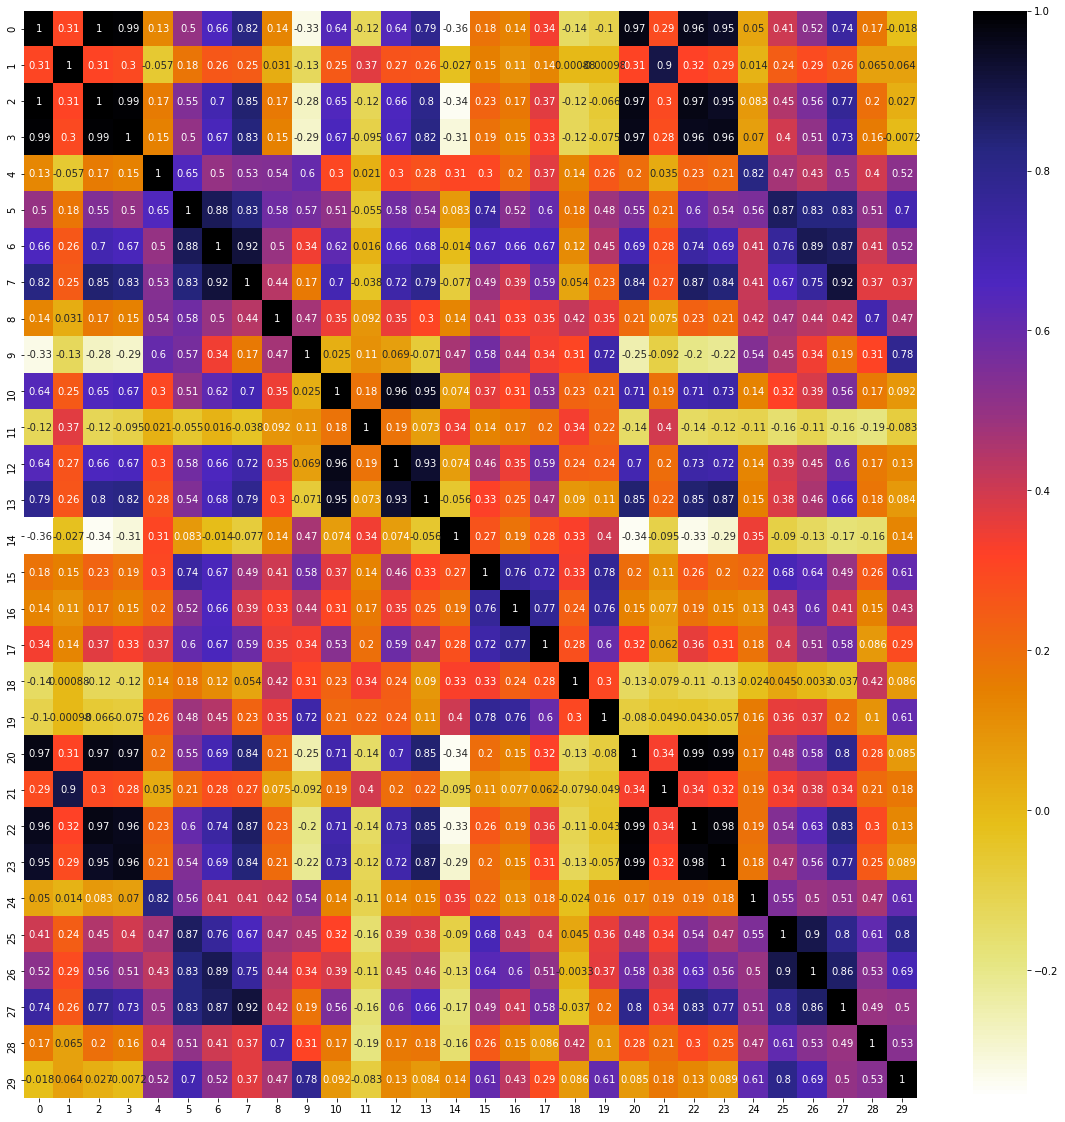

In [11]:
#plotting Correlation
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
#Function for finding Correlation between values
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
#Finding number of total features that correlate over 90%
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

9

In [14]:
#Dropping the correlated features
X_train.drop(corr_features,axis=1)

,0,1,4,5,6,8,9,10,11,14,...,16,17,18,19,21,24,25,26,28,29
0,-1.336717,-0.233951,0.253550,-0.916070,-0.820022,-1.163451,0.846480,0.430973,0.011984,-0.097919,...,-0.317666,-0.901826,-0.111497,-0.444040,-0.117294,-0.005509,-0.981528,-0.811541,-0.690373,-0.201779
1,1.490522,-0.172984,0.560729,0.367718,0.504388,0.388561,-0.496795,1.353735,-0.085562,-0.231117,...,-0.119527,0.531197,-0.227976,-0.482021,0.425032,1.231073,0.535587,0.498348,1.020239,-0.119911
2,-0.305790,0.619592,2.096623,1.639269,1.179182,2.023649,1.425246,-0.416152,-0.430587,-0.487292,...,0.082263,0.023990,0.148639,-0.069293,0.875233,1.566777,1.700229,1.222020,2.348608,1.137122
3,-0.265293,0.356213,-0.734310,0.027363,0.204759,-0.951985,-0.417383,-0.378754,-0.816437,0.063820,...,0.434732,0.069508,-0.604590,-0.257028,-0.040812,0.070980,0.559003,0.797683,-0.518206,-0.182089
4,-0.522736,-0.326621,-0.748971,-0.777825,-0.672096,0.588699,-0.137422,-0.778786,-0.466174,-0.562348,...,-0.435155,-0.680898,-0.296569,-0.526875,-0.082530,-0.498442,-0.526147,-0.428871,0.350526,-0.203852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,-0.919023,-0.892398,0.239587,-0.010879,-0.517246,0.177095,0.682272,-1.080490,-1.268763,-0.930226,...,-0.181922,-0.881342,-1.056268,0.264579,-1.102868,-0.009759,0.774062,0.252175,-0.489775,1.178574
309,-1.254566,-0.258338,-1.938591,-1.606723,-1.161196,-0.608352,0.157345,-0.216136,6.583717,-1.903130,...,-1.096947,-1.969074,2.291846,-0.814808,-0.845611,-2.645676,-1.459771,-1.359444,-1.551207,-1.018903
310,0.235129,-0.636335,1.321695,1.098143,0.966421,1.294845,0.589400,0.089350,-0.526508,-0.045416,...,-0.097622,0.097145,-0.551528,-0.020460,0.291189,2.310427,1.132697,0.893470,1.096055,1.100852
311,-0.256615,-0.151035,1.293769,0.298882,0.382270,1.185336,0.601514,-0.496831,-0.626222,-0.205041,...,-0.132802,0.006107,-0.369044,-0.107636,0.392006,1.919480,0.939207,1.038109,1.593601,1.691544


In [15]:
X_test = pd.DataFrame(X_test)
X_test.drop(corr_features, axis=1)

,0,1,4,5,6,8,9,10,11,14,...,16,17,18,19,21,24,25,26,28,29
0,0.242205,-1.085302,-0.838257,-0.948556,-0.623651,-0.559011,-1.424768,-0.556182,-0.975560,-0.076579,...,-0.475009,-0.144622,-0.550477,-0.775747,-1.324506,-0.899008,-0.922857,-0.712323,-0.973539,-1.289731
1,-0.455539,-1.619757,0.384370,-0.614812,-0.556588,0.394777,-0.549860,-0.500856,-0.904606,0.399066,...,-0.420725,0.152339,-0.195521,-0.593491,-1.634602,0.241162,-0.768502,-0.650015,-0.210356,-0.934666
2,0.623302,-0.768332,0.113877,0.641866,-0.243706,0.493335,0.339462,-0.692010,-1.200137,-0.858529,...,-0.348346,0.080105,-0.185202,-0.030789,-1.075151,-0.454064,0.008720,-0.264676,0.294304,0.301002
3,0.424347,1.054828,1.432530,1.375593,1.359348,-0.088475,1.075999,-0.199049,1.263184,0.930209,...,0.750296,1.436491,-0.008756,0.864560,1.672553,1.849449,1.471762,1.413229,0.077579,1.266280
4,0.878301,1.795198,0.126050,0.084777,0.157851,-0.132985,-0.079975,1.653440,-0.090639,0.646316,...,-0.140393,0.500665,-0.070667,0.249396,1.378442,1.237651,-0.055443,-0.032677,0.072935,0.357451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.146931,1.295448,-0.591432,0.288590,0.160200,0.118179,0.006507,-0.444287,-0.212801,0.076396,...,0.158844,0.025529,-0.046934,0.907696,0.937275,0.032594,1.008697,0.586429,0.346937,1.017904
101,-1.097240,0.437082,-1.078319,-1.136064,-0.995845,-0.651210,0.147760,-0.659064,0.225643,-0.426642,...,-0.819239,-1.273552,-0.689777,-0.530148,0.491312,-0.959261,-1.105419,-1.144283,-0.950318,-0.206474
102,2.175713,-0.495320,-0.221534,-0.346288,0.346943,-0.374612,-1.848529,2.517210,-0.259658,-0.482140,...,-0.309186,0.081710,-0.877574,-0.766421,0.091704,0.139195,-0.549379,0.065426,-0.701084,-1.091030
103,-1.194476,-0.011767,-0.825409,-0.946178,-0.750378,-0.810175,-0.146278,-0.315296,0.262459,0.183834,...,-0.244099,-0.296312,0.092365,0.147193,-0.044162,-0.620918,-0.956997,-0.785679,-0.636066,-0.286067


In [16]:
# Creating a function for the models to detect Cancer
def models(X_train, Y_train):
    #Logistic Regression Model
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    #Decision Tree
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)

    #Random Forest Classifier
    forest = RandomForestClassifier(n_estimators=10, criterion= 'entropy', random_state=0)
    forest.fit(X_train, Y_train)

    #SVM 
    clf = svm.SVC()
    clf.fit(X_train,Y_train)

    #KNN Classifier
    neigh = KNeighborsClassifier()
    neigh.fit(X_train, Y_train)

    #print accuracies of each model 
    print("[0] Logistic Regression Training Accuracy: ", log.score(X_train,Y_train))  
    print("[1] Decision Tree Classifier Training Accuracy: ", tree.score(X_train,Y_train))  
    print("[2] Random Forest Classifier Training Accuracy: ", forest.score(X_train,Y_train))  
    print("[3] Support Vector Machine Classifier Training Accuracy: ", clf.score(X_train,Y_train))  
    print("[4] KNN Classifier Training Accuracy: ", neigh.score(X_train, Y_train))
    return log, tree, forest, clf, neigh

In [17]:
#Getting training from model
model = models(X_train, Y_train)

[0] Logistic Regression Training Accuracy:  0.9904153354632588
[1] Decision Tree Classifier Training Accuracy:  1.0
[2] Random Forest Classifier Training Accuracy:  1.0
[3] Support Vector Machine Classifier Training Accuracy:  0.987220447284345
[4] KNN Classifier Training Accuracy:  0.9680511182108626


In [18]:
#Finding Real Accuracy Scores by getting True positives, True Negative via Classification Reports and Accuracy Score
for i in range(5):
    print('Model: ', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    print("Accuracy is: ",accuracy_score(Y_test, model[i].predict(X_test)))

Model:  0
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.95      0.97      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Accuracy is:  0.9714285714285714
Model:  1
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        66
           1       0.90      0.95      0.92        39

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Accuracy is:  0.9428571428571428
Model:  2
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.93      0.95      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.9

In [27]:
#Print Prediction of Models
for i in range(5):
    pred = model[4].predict(X_test)
    print("\nModel Prediction:",i,pred)
    print("\nActual", Y_test.values)
    print("____________________________________________")


Model Prediction: 0 [0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0]

Actual [0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0]
____________________________________________

Model Prediction: 1 [0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0]

Actual [0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0]
_________________________________________

In [20]:
testset = pd.read_csv('Test_Set.csv',header=None, index_col=None)
testset = sc.fit_transform(testset)
testset = pd.DataFrame(testset)
testset.drop(corr_features, axis=0)
testset.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.023061,0.214364,0.046922,-0.099529,0.373060,0.501288,0.467169,0.351520,0.611045,0.537345,...,0.360092,0.684422,0.272551,0.217950,1.170944,1.281147,1.293920,1.139346,3.335772,1.357079
1,-0.594752,0.073025,-0.598920,-0.592678,0.146483,-0.321363,-0.536252,-0.144896,0.722134,-0.209380,...,-0.413583,0.425613,-0.475046,-0.456718,0.610402,-0.205353,-0.571800,-0.025813,-0.368680,0.053631
2,0.882991,0.021629,0.881455,0.738851,-0.343114,0.484723,0.277372,0.751198,-1.089778,-1.069844,...,0.775769,0.055046,0.899662,0.542309,0.391653,0.811726,0.535679,1.294598,0.093266,-0.150949
3,2.483183,1.595632,2.654990,2.729359,1.591506,2.319278,3.555328,3.060208,1.568715,0.146675,...,1.710544,1.060871,1.988396,1.784855,1.098028,1.363074,2.814039,2.515095,0.572979,0.445465
4,-0.155047,0.970314,-0.071719,-0.221391,3.033360,1.664967,0.965387,1.198582,1.764080,2.111567,...,0.533125,2.409324,0.580300,0.399258,4.242533,2.132157,1.127096,1.408347,2.765446,1.843540


In [25]:
for i in range(5):
    print("\nModel: ",i)
    pred2 = model[i].predict(testset)
    print("\nModel Prediction ", i, pred2)
    print("\n___________________________")


Model:  0

Model Prediction  0 [1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0]

___________________________

Model:  1

Model Prediction  1 [1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0]

___________________________

Model:  2

Model Prediction  2 [1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 